<a href="https://colab.research.google.com/github/eldadHaber/EOAS555/blob/main/eoas555_Sep23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt

#import torch.nn as nn
#import torch.nn.functional as F
#import torch.optim as optim

In [ ]:
# Solve the system
# S_t = - beta*E*S - gamma*I*S
# E_t = beta*E*S + gamma*I*S - alpha*E
# I_t = alpha*E - mu*I

# define y = [S, E, I]; theta = [beta, gamma, alpha, mu]; dy/dt = f(y, theta)

def SEIRfun(y, theta):
  F = torch.zeros_like(y)
  F[0] = -theta[0]*y[1]*y[0] - theta[1]*y[2]*y[0] 
  F[1] = theta[0]*y[1]*y[0] + theta[1]*y[2]*y[0] - theta[2]*y[1]
  F[2] = theta[2]*y[1] - theta[3]*y[2]

  return F


In [ ]:
def forwardEuler(fun, y0, theta, h, n):
  k = y0.shape[0]
  Y = torch.zeros(k, n+1)
  Y[:,0] = y0

  for i in range(n):
    Y[:,i+1] = Y[:,i] + h*fun(Y[:,i], theta)

  return Y


In [ ]:
beta = 0.8
gamma = 0.1
alpha = 0.01
mu = 0.01
theta = torch.tensor([beta, gamma, alpha, mu])
S = 0.95
E = 0.04
I = 0.01
y0 = torch.tensor([S,E,I])
dt = 0.1
n = 1000
Y = forwardEuler(SEIRfun, y0, theta, dt, n)



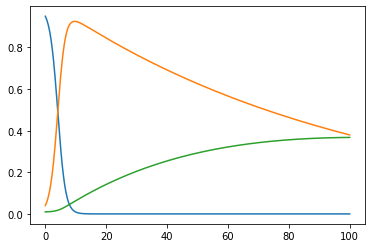

In [ ]:
t = torch.arange(1001)*dt
plt.plot(t,Y[0,:],t,Y[1,:],t,Y[2,:])